In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [1]:
import pandas as pd

In [3]:
diabetes_df = pd.read_csv("assets/diabetes_prediction_dataset.csv")
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
diabetes_df['age'] = diabetes_df['age'].astype(int)

In [5]:
diabetes_df.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [6]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
## removing duplicated rows
print(diabetes_df.shape)
duplicates = diabetes_df.duplicated()
print(duplicates.sum())
diabetes_df = diabetes_df[~duplicates]
print(diabetes_df.shape)

(100000, 9)
3888
(96112, 9)


In [8]:
diabetes_df["diabetes"].value_counts()

diabetes
0    87630
1     8482
Name: count, dtype: int64

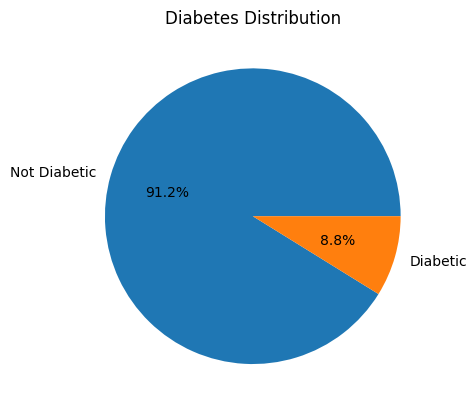

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df):
  fig, ax = plt.subplots()
  ax.pie(df["diabetes"].value_counts(), labels = ["Not Diabetic", "Diabetic"], autopct='%1.1f%%')
  ax.set_title("Diabetes Distribution")
  plt.show()
plot_distribution(diabetes_df)

In [10]:
cat_features = diabetes_df.columns[diabetes_df.dtypes == "object"].tolist()
num_features = diabetes_df.columns[(diabetes_df.dtypes == "float64" )|( diabetes_df.dtypes == "int64") ].tolist()

In [11]:
#removing rows with age less than 1 year.
diabetes_df = diabetes_df[diabetes_df["age"] >= 1]
diabetes_df.shape

(95212, 9)

In [12]:
diabetes_df[num_features].corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.256417,0.238709,0.328268,0.106017,0.114224,0.263804
hypertension,0.256417,1.000000,0.119469,0.145824,0.081362,0.084789,0.194998
heart_disease,0.238709,0.119469,1.000000,0.059178,0.068118,0.070826,0.170198
bmi,0.328268,0.145824,0.059178,1.000000,0.083333,0.092161,0.213206
HbA1c_level,0.106017,0.081362,0.068118,0.083333,1.000000,0.173050,0.407838
blood_glucose_level,0.114224,0.084789,0.070826,0.092161,0.173050,1.000000,0.425606
diabetes,0.263804,0.194998,0.170198,0.213206,0.407838,0.425606,1.000000


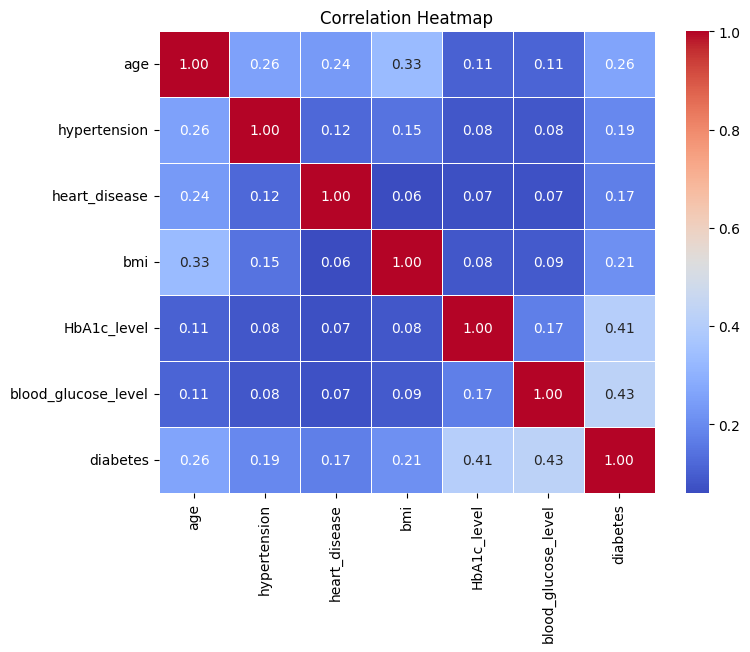

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_df[num_features].corr(), annot=True, cmap="coolwarm",  fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
#dropping categorical variables
diabetes_df.drop(cat_features,axis=1, inplace = True)

In [15]:
## categorical variables often provide uniqueness. correcting for some duplication
# that might happen because the categorical features were dropped
print(diabetes_df.shape)
duplicates = diabetes_df.duplicated()
print(duplicates.sum())
diabetes_df = diabetes_df[~duplicates]
print(diabetes_df.shape)

(95212, 7)
9071
(86141, 7)


In [16]:
diabetes_df.diabetes.value_counts()

diabetes
0    77742
1     8399
Name: count, dtype: int64

## HANDLING CLASS IMBALANCE

In [17]:
# solving unbalanced dataset problem using ydata_synthetic.synthesizers
from helper_functions import generate_data, synthetic_data_model, patient_id_and_date, clean_up

#Synthesize the minority class
training_df = diabetes_df.loc[diabetes_df['diabetes'] == 1].copy()
training_df.head()

2024-07-18 10:56:21.910489: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 10:56:24.845664: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 10:56:24.845865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 10:56:25.454494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 10:56:26.739116: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 10:56:26.750303: I tensorflow/core/platform/cpu_feature_guard.cc:1

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
6,44,0,0,19.31,6.5,200,1
26,67,0,1,27.32,6.5,200,1
38,50,1,0,27.32,5.7,260,1
40,73,0,0,25.91,9.0,160,1
53,53,0,0,27.32,7.0,159,1


In [18]:
synth, train_args = generate_data()
synth.fit(data=training_df, train_arguments=train_args, num_cols=num_features, cat_cols=['diabetes'])


Epoch: 0 | critic_loss: 0.12047974765300751 | generator_loss: -0.03910485655069351
Epoch: 1 | critic_loss: 0.09897996485233307 | generator_loss: 0.012554535642266273
Epoch: 2 | critic_loss: 0.6302741169929504 | generator_loss: -0.8295647501945496
Epoch: 3 | critic_loss: 0.12116822600364685 | generator_loss: -0.2912102937698364
Epoch: 4 | critic_loss: -0.074551060795784 | generator_loss: 0.10876497626304626
Epoch: 5 | critic_loss: -0.10492357611656189 | generator_loss: -0.25841259956359863
Epoch: 6 | critic_loss: 0.2604188919067383 | generator_loss: -0.7375150918960571
Epoch: 7 | critic_loss: 0.2971113920211792 | generator_loss: -0.7414510250091553
Epoch: 8 | critic_loss: 0.05112189054489136 | generator_loss: -0.5111925005912781
Epoch: 9 | critic_loss: 0.2417934536933899 | generator_loss: -0.3601129949092865
Epoch: 10 | critic_loss: 0.20314514636993408 | generator_loss: -1.125754475593567
Epoch: 11 | critic_loss: 0.3287113308906555 | generator_loss: -0.7892115116119385
Epoch: 12 | criti

In [19]:
synth_data = synth.sample(67000)
synth_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,71,1,1,25.595065,5.679669,240,1
1,78,0,0,33.015374,6.045406,130,1
2,81,0,0,33.558924,5.718630,160,1
3,24,0,1,38.313226,5.655360,128,1
4,67,0,0,46.175598,8.765496,238,1


In [20]:
synth_data["bmi"] = synth_data["bmi"].round(2)
synth_data["HbA1c_level"] = synth_data["HbA1c_level"].round(1)

In [21]:
combined_data = pd.concat([diabetes_df, synth_data], ignore_index=True)
combined_data.shape

(153141, 7)

In [22]:
duplicates = combined_data.duplicated()
combined_data = combined_data[~duplicates]
combined_data.shape

(153104, 7)

In [23]:
#drop rows with unrealistic data eg negative age etc
combined_data = clean_up(combined_data)
combined_data.shape

(153101, 7)

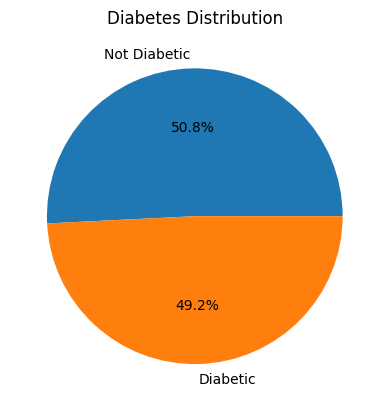

In [24]:
plot_distribution(combined_data)

In [25]:
combined_data = combined_data.sample(frac=1).reset_index(drop=True)
print(combined_data.diabetes.value_counts())
combined_data.head(10)

diabetes
0    77742
1    75359
Name: count, dtype: int64


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,54,0,1,38.36,5.7,254,1
1,51,0,0,23.04,6.2,155,0
2,8,0,0,19.10,4.5,85,0
3,59,0,0,33.42,6.1,260,1
4,72,0,1,34.44,5.8,160,0
5,52,0,0,26.55,6.6,80,0
6,59,0,0,19.46,5.8,200,1
7,20,0,0,25.22,6.5,130,0
8,80,0,0,23.46,6.5,200,0
9,29,0,0,26.39,3.5,145,0


<h2>creating a model to synthesize data for feature pipeline</h2>

In [26]:
synth,_ = generate_data()
synth.fit(data=combined_data, train_arguments=train_args, num_cols=num_features, cat_cols=['diabetes'])

Epoch: 0 | critic_loss: -0.050653815269470215 | generator_loss: -0.5078874230384827
Epoch: 1 | critic_loss: 0.1863432675600052 | generator_loss: -1.4848711490631104
Epoch: 2 | critic_loss: 0.038906216621398926 | generator_loss: -1.9827600717544556
Epoch: 3 | critic_loss: 0.16665604710578918 | generator_loss: -2.267357587814331
Epoch: 4 | critic_loss: 0.0956108570098877 | generator_loss: -1.7912636995315552
Epoch: 5 | critic_loss: 0.15086978673934937 | generator_loss: -2.019153594970703
Epoch: 6 | critic_loss: 0.1553225964307785 | generator_loss: -2.099614143371582
Epoch: 7 | critic_loss: 0.1472136229276657 | generator_loss: -2.0409140586853027
Epoch: 8 | critic_loss: 0.08294496685266495 | generator_loss: -2.112948179244995
Epoch: 9 | critic_loss: 0.06536047160625458 | generator_loss: -2.155154228210449
Epoch: 10 | critic_loss: 0.06269769370555878 | generator_loss: -2.0963525772094727
Epoch: 11 | critic_loss: 0.1320376992225647 | generator_loss: -2.1419036388397217
Epoch: 12 | critic_lo

In [27]:
# saving the model
import os
model_dir="synth_data_model"
if not os.path.isdir(model_dir): 
    os.mkdir(model_dir)

model_path = os.path.join(model_dir, "synth_data_model.pkl")

synth.save(model_path)

In [28]:
#loading and testing synthetic_data_model for 
model = synthetic_data_model(model_path)
new_synth_data = model.sample(100)
new_synth_data.diabetes.value_counts()

diabetes
0    55
1    45
Name: count, dtype: int64

<h3>Writing features to a feature store </h3>

In [29]:
##adding a datetime column to the dataframe before saving it in feature store 
combined_data = patient_id_and_date(combined_data)
combined_data.head(3)

,patient_id,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,datetime
0,0,54,0,1,38.36,5.7,254,1,2024-07-18 12:24:25.622299
1,1,51,0,0,23.04,6.2,155,0,2024-07-18 12:24:25.622299
2,2,8,0,0,19.10,4.5,85,0,2024-07-18 12:24:25.622299


In [30]:
combined_data = combined_data.sample(frac=1).reset_index(drop=True)
combined_data.head(3)

,patient_id,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,datetime
0,32483,18,0,0,18.27,5.7,159,0,2024-07-18 12:24:25.622299
1,85923,64,0,0,35.00,3.5,158,0,2024-07-18 12:24:25.622299
2,127794,64,0,0,38.28,5.7,260,1,2024-07-18 12:24:25.622299


In [32]:
# duplicates = combined_data.duplicated()
# combined_data[duplicates]

In [33]:
from dotenv import load_dotenv
load_dotenv()
hopswork_key = os.getenv("HOPSWORK_KEY")

In [34]:
import hopsworks
project = hopsworks.login(api_key_value=hopswork_key)
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/112801
Connected. Call `.close()` to terminate connection gracefully.


In [36]:
fg = fs.get_or_create_feature_group(
    name="diabetes_features_backfill",
    version=1,
    primary_key=['patient_id', 'datetime'],  
    event_time='datetime',
    description="Historical data for diabetes prediction"
)

In [37]:
fg.insert(combined_data)

2024-07-18 14:02:51,294 WARNING: FeatureGroupWarning: The ingested dataframe contains upper case letters in feature names: `['HbA1c_level']`. Feature names are sanitized to lower case in the feature store.

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/112801/fs/112720/fg/1014104


Uploading Dataframe: 0.00% |          | Rows 0/153101 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: diabetes_features_backfill_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/112801/jobs/named/diabetes_features_backfill_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f066e70d7e0>, None)